In [1]:
import os

os.chdir("../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm

from modular_splicing.module_substitution.evaluate_combinations import (
    table_of_combinations,
)

from modular_splicing.topline_results.renderer import plot_topline_results
from modular_splicing.topline_results.gather_results import gather_results

from modular_splicing.models_for_testing.list import FM_full, AM, FM_sai_full, AM_sai

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
result_df = table_of_combinations()

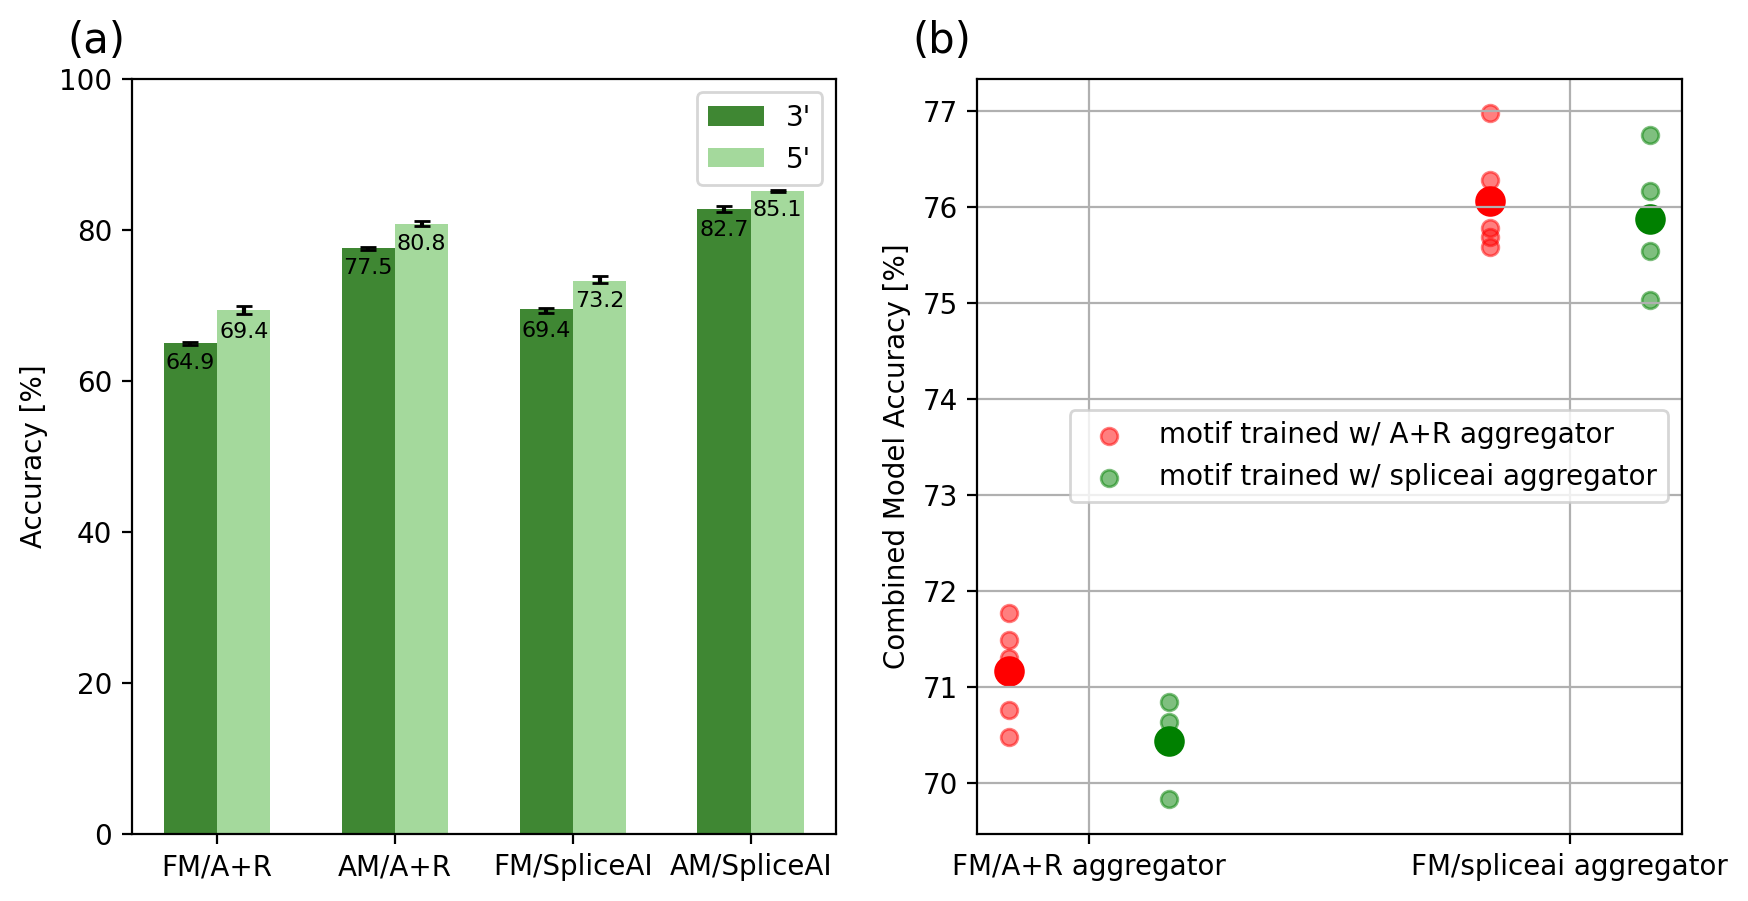

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
plot_topline_results(
    gather_results(
        {
            name: m.non_binarized_models()
            for name, m in [
                ("FM/A+R", FM_full),
                ("AM/A+R", AM),
                ("FM/SpliceAI", FM_sai_full),
                ("AM/SpliceAI", AM_sai),
            ]
        }
    ),
    axs[0],
)

our_models = [x.name for x in AM.non_binarized_models()]
sad_models = [x.name for x in AM_sai.non_binarized_models()]

our_res, sad_res = [
    result_df.loc[[f"M={m}" for m in ms]] for ms in (our_models, sad_models)
]

labels = ["FM/A+R aggregator", "FM/spliceai aggregator"]
start_2 = 3
for name, data, off, color in [
    ("A+R", our_res, 0, "red"),
    ("spliceai", sad_res, 1, "green"),
]:
    axs[1].scatter(
        [off] * len(data["D=FM_1"]) + [off + start_2] * len(data["D=FM/sai_1"]),
        [*data["D=FM_1"], *data["D=FM/sai_1"]],
        alpha=0.5,
        label=f"motif trained w/ {name} aggregator",
        color=color,
    )
    axs[1].scatter(
        [off, off + start_2],
        [data["D=FM_1"].mean(), data["D=FM/sai_1"].mean()],
        s=100,
        color=color,
    )
axs[1].set_xticks([0.5, start_2 + 0.5], labels)
axs[1].set_ylabel("Combined Model Accuracy [%]")
axs[1].grid("y")
axs[1].legend()

for i in range(len(axs)):
    axs[i].text(
        -0.05,
        1.05,
        "(" + "ab"[i] + ")",
        horizontalalignment="center",
        verticalalignment="center",
        transform=axs[i].transAxes,
        fontsize=15,
    )


plt.show()